In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [72]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=N,
                                             n_features=2,
                                             n_classes=2,
                                             shuffle=True,
                                             random_state=None
                                             )
X, y = gaussian_quantiles
y = y[:,np.newaxis]

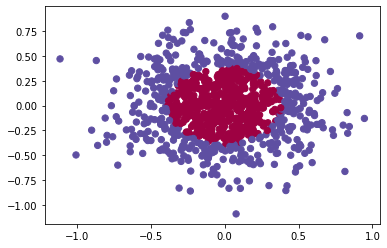

In [73]:
plt.scatter(X[:,0], X[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral)

Activation Funcions

In [74]:
def sigmoid(x,derivate=False):
  if derivate:
    return np.exp(-x)/(( np.exp(-x) +1)**2)
  else:
    return 1 / (1+np.exp(-x))

def relu(x,derivate=False):
  if derivate:
    x[x<=0] = 0
    x[x>0] = 1
    return x
  else:
    return np.maximum(0,x)

Loss Function

In [75]:
def mse(predict,real, derivate=False):
  if derivate:
    return 2*(real-predict)
  else:
    return np.mean((real-predict)**2)

Initialize

In [76]:
def initialize_parameters(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0,L-1):
    parameters["W"+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) *2) -1
    parameters["b"+str(l+1)] = (np.random.rand(1,layers_dim[l+1]) *2) -1

  return parameters

Train

In [77]:
def fordward_train(params,X):
  params["A0"] = X
  params["Z1"] = np.matmul(params["A0"],params["W1"]) + params["b1"]
  params["A1"] = relu(params["Z1"])

  params["Z2"] = np.matmul(params["A1"],params["W2"]) + params["b2"]
  params["A2"] = relu(params["Z2"])

  params["Z3"] = np.matmul(params["A2"],params["W3"]) + params["b3"]
  params["A3"] = sigmoid(params["Z3"])

  output = params["A3"]
  return output

Backpropagation

In [78]:
def backpropagation(params,y,output):
  params["dZ3"] = mse(y,output,True)*sigmoid(params["A3"],True)
  params["dW3"] = np.matmul(params["A2"].T,params["dZ3"])

  params["dZ2"] = np.matmul(params["dZ3"],params["W3"].T)*relu(params["A2"],True)
  params["dW2"] = np.matmul(params["A1"].T,params["dZ2"])

  params["dZ1"] = np.matmul(params["dZ2"],params["W2"].T)*relu(params["A1"],True)
  params["dW1"] = np.matmul(params["A0"].T,params["dZ1"])

Gradient descent

In [79]:
def gradientDescent(params,learning_rate):
  params["W3"] = params["W3"] - params["dW3"] * learning_rate
  params["b3"] = params["b3"] - (np.mean(params["dW3"],axis=0,keepdims=True)) * learning_rate

  params["W2"] = params["W2"] - params["dW2"] * learning_rate
  params["b2"] = params["b2"] - (np.mean(params["dW2"],axis=0,keepdims=True)) * learning_rate

  params["W1"] = params["W1"] - params["dW1"] * learning_rate
  params["b1"] = params["b1"] - (np.mean(params["dW1"],axis=0,keepdims=True)) * learning_rate

In [80]:
def train(params,X,y,learning_rate=0.001,train=True):
  output = fordward_train(params,X)
  if train:
    backpropagation(params,y,output)
    gradientDescent(params,learning_rate)
  return output

Test

In [86]:
layer_dims = [2,8,8,1]
params = initialize_parameters(layer_dims)
error = []
for i in range(30000):
  output = train(params,X,y,learning_rate=0.00001)
  if i % 25 == 0:
    err = mse(y,output)
    print(err)
    error.append(err)

0.42673897870440874
0.40264811256564986
0.37674857926687044
0.35066348748974163
0.3260309098867716
0.3041186538108361
0.28566073974787015
0.2708497694224882
0.259424735645751
0.2508712048678044
0.24461165354145545
0.24008235966316388
0.23680692722471244
0.23441436011534922
0.23263737750782937
0.23128239861920394
0.2302171893627326
0.22932518443505967
0.22855955511071696
0.22792848693482812
0.22737824218559421
0.2268678650086158
0.2263997089869901
0.22596634437108054
0.22558110600261141
0.2252204178046743
0.22488104385735516
0.224558568485154
0.22424538209899653
0.2239354912323987
0.22363679028726502
0.22335375749063377
0.2230754033930595
0.22279666193566783
0.22252063495668642
0.22224473447411647
0.2219694128719051
0.2216956382188449
0.22142965862056838
0.22116961359202691
0.22091214028545764
0.22065871260187658
0.22040649283204677
0.22015435883031986
0.2199042958457996
0.21965429599971323
0.21940333179007182
0.2191532526571503
0.21890342843954091
0.21865448435950402
0.2184059688103264

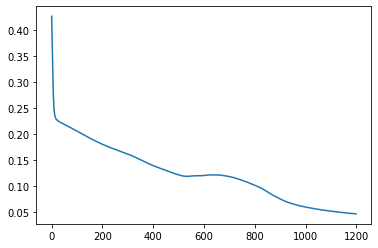

In [87]:
plt.plot(error)

In [91]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y_test = fordward_train(params,data_test)

In [92]:
y_test = np.where(y_test >= 0.5, 1, 0)

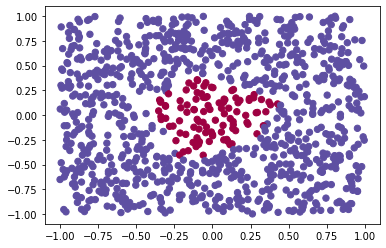

In [93]:
plt.scatter(data_test[:,0], data_test[:,1], c=y_test[:,0] ,s=40, cmap=plt.cm.Spectral);